# A Tutorial for Downloading Market Data From yfinance API

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
startDate = '2020-01-01'
data = yf.download('AAPL', start=startDate)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167595,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


In [54]:
data['MA50'] = data['Close'].rolling(window=20).mean()
data = data.dropna()

In [55]:
# Define the features (X) and the target variable (y)
X = data[['MA50']]  # Ensure this is a DataFrame, hence using double brackets
y = data['Close']   # This is a Series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

RMSE: 7.338312860482042


/Users/mcdonald/miniconda3/envs/finance-env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


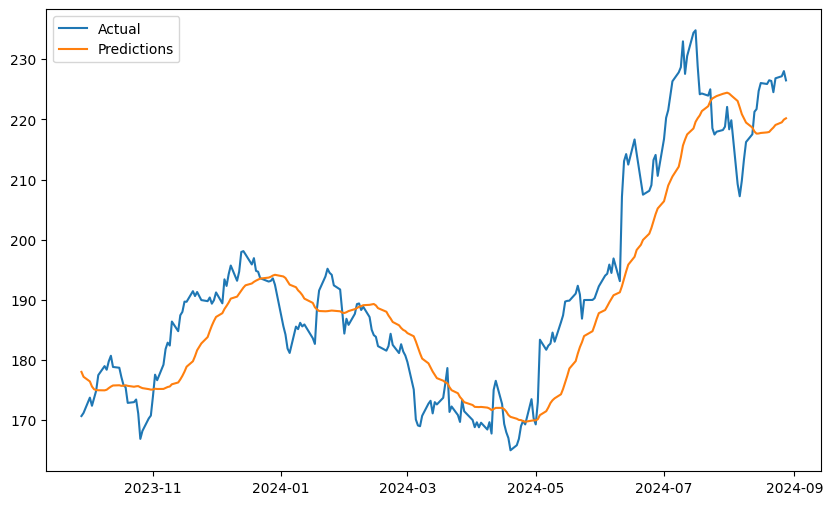

In [60]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predictions')
plt.legend()
plt.show()